In [1]:
# Problem - I decided to treat this as a classification problem by creating
# (did the woman have at least one affair?) and trying to predict the classi
# Dataset
# The dataset I chose is the affairs dataset that comes with Statsmodels. It
# by Redbook magazine, in which married women were asked about their partici
# information about the study is available in a 1978 paper from the Journal
# Description of Variables
# The dataset contains 6366 observations of 9 variables:
# rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very goo
# age: woman's age
# yrs_married: number of years married
# children: number of children
# religious: woman's rating of how religious she is (1 = not religious, 4 =
# educ: level of education (9 = grade school, 12 = high school, 14 = some co
# college graduate, 17 = some graduate school, 20 = advanced degree)
# occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unsk
# "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = manageria
# professional with advanced degree)
# occupation_husb: husband's occupation (same coding as above)
# affairs: time spent in extra-marital

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [11]:
import numpy as np
import pandas as pd
#using pandas.tseries instead of statsmodels.api
import pandas.tseries as pdt
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()

In [12]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [13]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
dta.shape

(6366, 10)

In [15]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [16]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [17]:
print("Lets analyze the data and look at the summary statistics")
dta.describe()

Lets analyze the data and look at the summary statistics


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


array([[<AxesSubplot:title={'center':'rate_marriage'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'yrs_married'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'religious'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'occupation_husb'}>,
        <AxesSubplot:title={'center':'affairs'}>],
       [<AxesSubplot:title={'center':'affair'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1296 with 0 Axes>

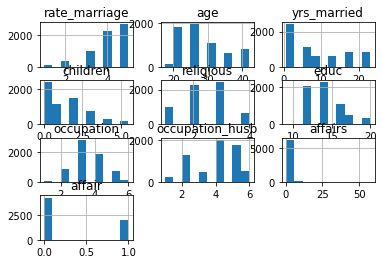

In [18]:
%matplotlib inline
plt.figure(figsize=(20,18))
dta.hist()

In [20]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Split the data into training and test set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [21]:
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.544110
         Iterations 6


In [22]:
predictions = result.predict(X_test)
predictions

4269    0.580333
1147    0.549048
1683    0.383588
2992    0.235009
5114    0.544926
          ...   
2165    0.319432
4682    0.177113
6310    0.468235
2921    0.195661
946     0.388241
Length: 1910, dtype: float64

In [23]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                  0.1357
Time:                        10:33:25   Log-Likelihood:                -2424.6
converged:                       True   LL-Null:                       -2805.3
Covariance Type:            nonrobust   LLR p-value:                1.014e-151
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0722      0.701      4.385      0.000       1.699       4.445
occ_2             0.6555      0.561      1.169      0.242      -0.443       1.754
occ_3             1.0832      0.554      1.957      0.050      -0.002       2.168
occ_4             0.8773      0.555      1.582      0.114      -0.210       1.964
occ_5             1.4714      0.560      2.629      0.009       0.374       2.568
occ_6             1.4254      0.611      2.333      0.020       0.228       2.623
occ_husb_2       -0.0836      0.211     -0.396      0.692      -0.497       0.330
occ_husb_3        0.0108      0.232      0.047      0.963      -0.443       0.465
occ_husb_4       -0.0677      0.204     -0.331      0.741      -0.468       0.333
occ_husb_5       -0.0752      0.206     -0.364      0.716      -0.480       0.330
occ_husb_6        0.0234      0.232      0.101      0.920      -0.432       0.479
rate_marriage    -0.6968      0.038    -18.570      0.000      -0.770      -0.623
age              -0.0697      0.012     -5.583      0.000      -0.094      -0.045
yrs_married       0.1199      0.013      9.003      0.000       0.094       0.146
children         -0.0126      0.039     -0.324      0.746      -0.089       0.064
religious        -0.3674      0.042     -8.819      0.000      -0.449      -0.286
educ             -0.0121      0.021     -0.574      0.566      -0.053       0.029
=================================================================================
"""

In [25]:
print("Logistic Regression with scikit-learn")
dta.head()

Logistic Regression with scikit-learn


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [26]:
print('Exploratary data analysis')
dta.affair.value_counts()


Exploratary data analysis


0    4313
1    2053
Name: affair, dtype: int64

In [31]:
print("We can conclude that women who have affairs, rate their marriage lower rate")
dta.groupby('affair').mean()

We can conclude that women who have affairs, rate their marriage lower rate


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [32]:
print('Checking rate_marriage paramerter')
dta.groupby('rate_marriage').mean()

Checking rate_marriage paramerter


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Lets visualize our data


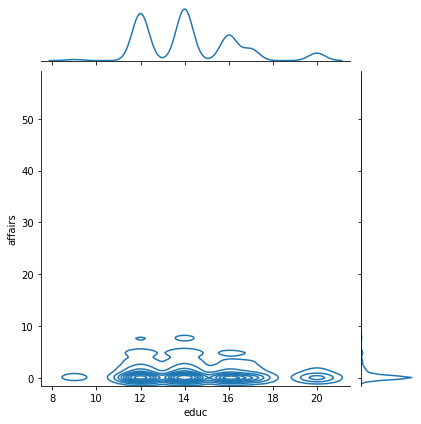

In [33]:
print('Lets visualize our data')
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')

Text(0, 0.5, 'Frequency')

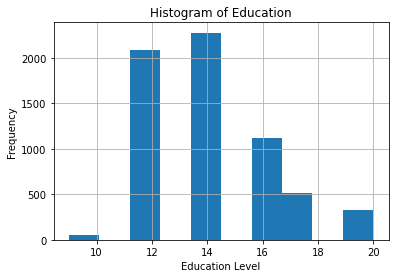

In [36]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

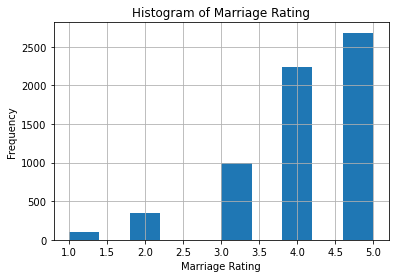

In [35]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

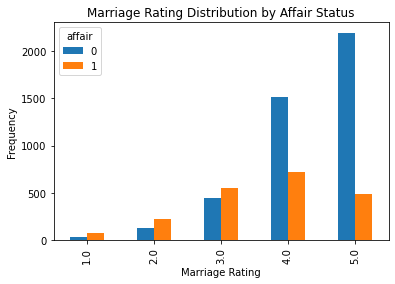

In [38]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

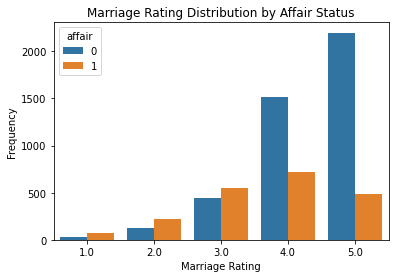

In [39]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

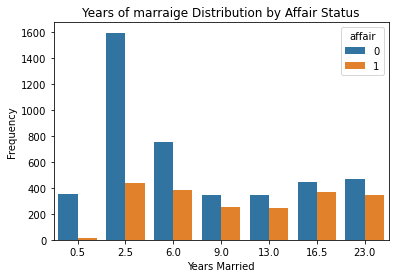

In [40]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

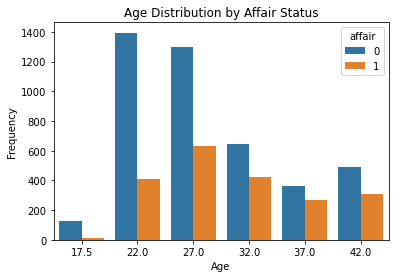

In [41]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [43]:
print("Model Evaluation Using a Validation Set")
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Model Evaluation Using a Validation Set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
print(model.score(X_train,y_train))
print("Training set has 73% accuracy")

0.7221723518850988
Training set has 73% accuracy


In [46]:
print("Use the test data set to predict the class / labels")
# predict class labels for the test set
predicted = model.predict(X_test)
predicted

Use the test data set to predict the class / labels


array([1., 1., 0., ..., 0., 0., 0.])

In [47]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs

array([[0.41933445, 0.58066555],
       [0.44534483, 0.55465517],
       [0.61709412, 0.38290588],
       ...,
       [0.53292281, 0.46707719],
       [0.81055607, 0.18944393],
       [0.61449044, 0.38550956]])

In [48]:
print('Evaluating the model')
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print("The accuracy of the model is 73% similar to the training data.")

Evaluating the model
0.7303664921465969
0.744489970252832
The accuracy of the model is 73% similar to the training data.


In [68]:
#Using confusion matrix to describe the performance of the classification mo
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predicted)

ModuleNotFoundError: No module named 'scikitplot'

In [67]:
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])

NameError: name 'scikitplot' is not defined

In [51]:
print(metrics.classification_report(y_test, predicted))


              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1299
         1.0       0.63      0.38      0.47       611

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.73      0.71      1910



In [52]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)

numpy.ndarray

In [53]:
cf.shape

(2, 2)

In [54]:
#Calculation of Precision Recall and F1 score
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.6304347826086957 , Recall : 0.37970540098199673, F1 : 0.4739530132788559


In [55]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.37970540098199673, False Positive Rate : 0.10469591993841416


In [57]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy')
scores, scores.mean()

(array([0.70957614, 0.72191673, 0.71956009, 0.72034564, 0.75019639]),
 0.7243189982500946)

In [65]:
print('Predicting the Probability of an Affair')
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]])))
print('The predicted probability of an affair is 23%')

Predicting the Probability of an Affair
[[0.78425569 0.21574431]]
The predicted probability of an affair is 23%


In [66]:
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30,10, 3, 4,16]])))
print('The predicted probability of an affair is 31%')

[[0.69541926 0.30458074]]
The predicted probability of an affair is 31%
